#**TM10007 Assignment by Group 14**

1.   Annemiek van Ravensberg (student number: 4545346)
2.   Laura Koopman (student number: 4480406)
3.   Rowan Toet (student number: 4557131)
4.   Casper van Eijck (student number: 4440781)


Run every part to see every step that was taken in computing the (three) classifiers and obtaining the accuracy. In some of the steps, multiple options are possible. Run the chosen option to continue. The extra options are to show the alternatives that were considered. The final block runs the whole script including cross validation, this gives the final accuracy and the classifiers used. NOTE: the accuracies given in the first part script are not fully correct, because a different splitting method is used than in the final loop.



## Module and data loading






Running the pip install to use from colab environment 

In [0]:
# Run this to use from colab environment
!pip install -q --upgrade git+https://github.com/karinvangarderen/tm10007_project.git

Importing the necessary packages

In [0]:
# General packages 
import pandas as pd
import numpy as np
import seaborn as sns
 
# load data
from adni.load_data import load_data
 
# Splitting the data
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
 
# Handling missing data
from sklearn.impute import SimpleImputer
 
# Removing outliers 
import matplotlib.pyplot as plt
from scipy import stats
 
# Scaling the data
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler 
 
# Learning curves
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve
 
# Feature selection
from sklearn import model_selection
from sklearn.linear_model import Lasso
from sklearn.decomposition import PCA
from sklearn import feature_selection
 
# Classifiers 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
import random
 
# Statistics
from sklearn import metrics
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import roc_curve, auc

Reading in the data from the adni file to a dataframe

In [0]:
# Data reading              
df = load_data()

# Display the number of rows (samples) and columns of original DataFrame                                           
print('Shape = (rows, columns)')
print(f'Shape of original DataFrame (df): {df.shape}')

Shape = (rows, columns)
Shape of original DataFrame (df): (855, 268)


Defining the x and y of the data that has to be splitted



In [0]:
# Selecting x and y
X = df.drop('label', axis=1)
y = df['label']
y = y.map({"AD": 1, "CN": 0})

# Display the number of rows (samples) and columns of X and y  
print('Shape = (rows, columns)')
print(f'Shape of X: {X.shape}')
print(f'Shape of y: {y.shape}')                                           

Shape = (rows, columns)
Shape of X: (855, 267)
Shape of y: (855,)


## Splitting the data in a train set and test set

*   Option 1: Simple (single) split
*   Option 2: Repeated split  
*   Option 3: Cross-validation (cv) split  
      


>#### **Used** *option*
Simple (single) split of the data


In [0]:
# Option 1             
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)  

# Display the new DataFrame shapes:
print('Shape = (rows, columns)')
print(f'Shape of X_train: {X_train.shape}, shape of y_train: {y_train.shape}')
print(f'Shape of X_test: {X_test.shape}, shape of y_test: {y_test.shape}')

Shape = (rows, columns)
Shape of X_train: (684, 267), shape of y_train: (684,)
Shape of X_test: (171, 267), shape of y_test: (171,)


> #### Other options
Repeated split and cross-validation split of the data

>Repeated splits of the data

In [0]:
# Option 2                                
sss = StratifiedShuffleSplit(n_splits=20, test_size=0.2, random_state=0)

for train_index, test_index in sss.split(X, y):
    
    X_train_2 = X.iloc[train_index]
    y_train_2 = y.iloc[train_index]
    X_test_2 = X.iloc[test_index]
    y_test_2 = y.iloc[test_index]

# Display the new DataFrame shapes:
print('Shape = (rows, columns)')
print(f'Shape of a single X_train: {X_train.shape}, shape of a single y_train: {y_train.shape}')
print(f'Shape of a single X_test: {X_test.shape}, shape of a single y_test: {y_test.shape}')

Shape = (rows, columns)
Shape of a single X_train: (684, 267), shape of a single y_train: (684,)
Shape of a single X_test: (171, 267), shape of a single y_test: (171,)


>Cross-validation split (cv) of the data

In [0]:
# Option 3                                 
cv_20fold = StratifiedKFold(n_splits=20)

for train_index, test_index in cv_20fold.split(X, y):

    X_train_3 = X.iloc[train_index]
    y_train_3 = y.iloc[train_index]
    X_test_3 = X.iloc[test_index]
    y_test_3 = y.iloc[test_index]

# Display the new DataFrame shapes:
print('Shape = (rows, columns)')
print(f'Shape of a single X_train: {X_train.shape}, shape of a single y_train: {y_train.shape}')
print(f'Shape of a single X_test: {X_test.shape}, shape of a single y_test: {y_test.shape}')

Shape = (rows, columns)
Shape of a single X_train: (684, 267), shape of a single y_train: (684,)
Shape of a single X_test: (171, 267), shape of a single y_test: (171,)


## Handling missing data

Eliminate columns with more than 50% zero values and imputate remaining zeros 
*   Option 1: Imputate zeros with mean column value
*   Option 2: Imputate zeros with median column value
*   Option 3: Imputate zeros with most_frequent value
*   Option 4: Imputate zeros with constant value



>Eliminate columns with more than 50% zero values

In [0]:
# Replace zero values with NaN values
X_train_NaN = X_train.replace(0, np.NaN)
X_test_NaN = X_test.replace(0, np.NaN)

# Keep columns with at least 50% no-NaN values (eliminate columns wiht more than 50% NaN values)
X_train_NaN_thresh = X_train_NaN.dropna(axis='columns', thresh=int(len(X_train_NaN.index)/2))
index_test = X_train_NaN_thresh.columns
X_test_NaN_thresh = X_test_NaN[index_test]
print(X_train_NaN_thresh.shape)
print(X_test_NaN_thresh.shape)

(684, 261)
(171, 261)


>#### **Used** option
Imputate zeros with median column value

In [0]:
# Option 2:

imp = SimpleImputer(strategy='median')
imp.fit(X_train_NaN_thresh)
X_train_imp = imp.transform(X_train_NaN_thresh)
X_test_imp = imp.transform(X_test_NaN_thresh)

# Return array to a DataFrame
X_train_final = pd.DataFrame(data=X_train_imp, index=X_train_NaN_thresh.index, columns=X_train_NaN_thresh.columns)
X_test_final = pd.DataFrame(data=X_test_imp, index=X_test_NaN_thresh.index, columns=X_test_NaN_thresh.columns)

# Display the old and new DataFrame shapes:
print('Shape = (rows, columns)')
print(f'Shape of X_train: {X_train.shape}, shape of X_test: {X_test.shape}')
print(f'Shape of X_train_final: {X_train_final.shape}, shape of X_test_final: {X_test_final.shape}')

Shape = (rows, columns)
Shape of X_train: (684, 267), shape of X_test: (171, 267)
Shape of X_train_final: (684, 261), shape of X_test_final: (171, 261)


>Evaluate accuracy after median imputation. This way an indication of the advantage obtained with imputation is given.

In [0]:
# Evaluate accuracy with 'median' imputation, testset

cv_20fold = StratifiedKFold(n_splits=20)

SVC_scores = []
KNN_scores = []
RF_scores = []

for train_index, val_index in cv_20fold.split(X_train, y_train):

    X_train_e1 = X_train.iloc[train_index]
    y_train_e1 = y_train.iloc[train_index]
    X_val = X_train.iloc[val_index]
    y_val = y_train.iloc[val_index]

    # Replace zero values with NaN values
    X_train_NaN = X_train_e1.replace(0, np.NaN)
    X_val_NaN = X_val.replace(0, np.NaN)
    # Keep columns with at least 50% no-NaN values (eliminate columns with more than 50% NaN values)
    X_train_NaN_thresh = X_train_NaN.dropna(axis='columns', thresh=int(len(X_train_NaN.index)/2))
    index_val = X_train_NaN_thresh.columns
    X_val_NaN_thresh = X_val[index_val]

    # Option 2 imputation:
    imp = SimpleImputer(strategy='median')
    imp.fit(X_train_NaN_thresh)               
    X_train_imp = imp.transform(X_train_NaN_thresh)
    X_val_imp = imp.transform(X_val_NaN_thresh)
    # Return array to a DataFrame
    X_train_final_e1 = pd.DataFrame(data=X_train_imp, index=X_train_NaN_thresh.index, columns=X_train_NaN_thresh.columns)
    X_val_final = pd.DataFrame(data=X_val_imp, index=X_val_NaN_thresh.index, columns=X_val_NaN_thresh.columns)

    # Evaluate imputation method using default classifiers:
    clf = SVC(gamma='auto')
    clf.fit(X_train_final_e1, y_train_e1)
    y_pred_val = clf.predict(X_val_final) 
    accuracy_val = metrics.accuracy_score(y_val, y_pred_val)
    SVC_scores.append(accuracy_val)

    clf = KNeighborsClassifier()
    clf.fit(X_train_final_e1, y_train_e1)
    y_pred_val = clf.predict(X_val_final) 
    accuracy_val = metrics.accuracy_score(y_val, y_pred_val)
    KNN_scores.append(accuracy_val)

    clf = RandomForestClassifier()
    clf.fit(X_train_final_e1, y_train_e1)
    y_pred_val = clf.predict(X_val_final) 
    accuracy_val = metrics.accuracy_score(y_val, y_pred_val)
    RF_scores.append(accuracy_val)

print('cv_20fold_split performed on data with median imputation: \n')
print(f'Mean accuracy of SVC classifier on validation data: {sum(SVC_scores)/len(SVC_scores)}')
print(f'Mean accuracy of KNN classifier on validation data: {sum(KNN_scores)/len(KNN_scores)}')
print(f'Mean accuracy of RF classifier on validation data: {sum(RF_scores)/len(RF_scores)}')

cv_20fold_split performed on data with median imputation: 

Mean accuracy of SVC classifier on validation data: 0.6067647058823528
Mean accuracy of KNN classifier on validation data: 0.6478991596638654
Mean accuracy of RF classifier on validation data: 0.8070588235294119


> #### Other options
>Imputate zeros with mean, most_frequent and constant. Evaluation is included so we get an indication of the advantage obtained with imputation

In [0]:
# Option 1: Evaluate accuracy with 'mean' imputation, testset

cv_20fold = StratifiedKFold(n_splits=20)

SVC_scores = []
KNN_scores = []
RF_scores = []

for train_index, val_index in cv_20fold.split(X_train, y_train):

    X_train_e1 = X_train.iloc[train_index]
    y_train_e1 = y_train.iloc[train_index]
    X_val = X_train.iloc[val_index]
    y_val = y_train.iloc[val_index]

    # Replace zero values with NaN values
    X_train_NaN = X_train_e1.replace(0, np.NaN)
    X_val_NaN = X_val.replace(0, np.NaN)
    # Keep columns with at least 50% no-NaN values (eliminate columns wiht more than 50% NaN values)
    X_train_NaN_thresh = X_train_NaN.dropna(axis='columns', thresh=int(len(X_train_NaN.index)/2))
    index_val = X_train_NaN_thresh.columns
    X_val_NaN_thresh = X_val_NaN[index_val]

    # Option 1 imputation:
    imp = SimpleImputer(strategy='mean')
    imp.fit(X_train_NaN_thresh)               
    X_train_imp = imp.transform(X_train_NaN_thresh)
    X_val_imp = imp.transform(X_val_NaN_thresh)
    # Return array to a DataFrame
    X_train_final_e1 = pd.DataFrame(data=X_train_imp, index=X_train_NaN_thresh.index, columns=X_train_NaN_thresh.columns)
    X_val_final = pd.DataFrame(data=X_val_imp, index=X_val_NaN_thresh.index, columns=X_val_NaN_thresh.columns)

    # Evaluate imputation method using default classifiers:
    clf = SVC(gamma='auto')
    clf.fit(X_train_final_e1, y_train_e1)
    y_pred_val = clf.predict(X_val_final) 
    accuracy_val = metrics.accuracy_score(y_val, y_pred_val)
    SVC_scores.append(accuracy_val)

    clf = KNeighborsClassifier()
    clf.fit(X_train_final_e1, y_train_e1)
    y_pred_val = clf.predict(X_val_final) 
    accuracy_val = metrics.accuracy_score(y_val, y_pred_val)
    KNN_scores.append(accuracy_val)

    clf = RandomForestClassifier()
    clf.fit(X_train_final_e1, y_train_e1)
    y_pred_val = clf.predict(X_val_final) 
    accuracy_val = metrics.accuracy_score(y_val, y_pred_val)
    RF_scores.append(accuracy_val)

print('cv_20fold_split performed on data with mean imputation: \n')
print(f'Mean accuracy of SVC classifier on validation data: {sum(SVC_scores)/len(SVC_scores)}')
print(f'Mean accuracy of KNN classifier on validation data: {sum(KNN_scores)/len(KNN_scores)}')
print(f'Mean accuracy of RF classifier on validation data: {sum(RF_scores)/len(RF_scores)}')

# Option 3: Evaluate accuracy with 'most_frequent' imputation, testset
cv_20fold = StratifiedKFold(n_splits=20)

SVC_scores = []
KNN_scores = []
RF_scores = []

for train_index, val_index in cv_20fold.split(X_train, y_train):

    X_train_e1 = X_train.iloc[train_index]
    y_train_e1 = y_train.iloc[train_index]
    X_val = X_train.iloc[val_index]
    y_val = y_train.iloc[val_index]

    # Replace zero values with NaN values
    X_train_NaN = X_train_e1.replace(0, np.NaN)
    X_val_NaN = X_val.replace(0, np.NaN)
    # Keep columns with at least 50% no-NaN values (eliminate columns wiht more than 50% NaN values)
    X_train_NaN_thresh = X_train_NaN.dropna(axis='columns', thresh=int(len(X_train_NaN.index)/2))
    index_val = X_train_NaN_thresh.columns
    X_val_NaN_thresh = X_val_NaN[index_val]

    # Option 3 imputation:
    imp = SimpleImputer(strategy='most_frequent')
    imp.fit(X_train_NaN_thresh)               
    X_train_imp = imp.transform(X_train_NaN_thresh)
    X_val_imp = imp.transform(X_val_NaN_thresh)
    # Return array to a DataFrame
    X_train_final_e1 = pd.DataFrame(data=X_train_imp, index=X_train_NaN_thresh.index, columns=X_train_NaN_thresh.columns)
    X_val_final = pd.DataFrame(data=X_val_imp, index=X_val_NaN_thresh.index, columns=X_val_NaN_thresh.columns)

    # Evaluate imputation method using default classifiers:
    clf = SVC(gamma='auto')
    clf.fit(X_train_final_e1, y_train_e1)
    y_pred_val = clf.predict(X_val_final) 
    accuracy_val = metrics.accuracy_score(y_val, y_pred_val)
    SVC_scores.append(accuracy_val)

    clf = KNeighborsClassifier()
    clf.fit(X_train_final_e1, y_train_e1)
    y_pred_val = clf.predict(X_val_final) 
    accuracy_val = metrics.accuracy_score(y_val, y_pred_val)
    KNN_scores.append(accuracy_val)

    clf = RandomForestClassifier()
    clf.fit(X_train_final_e1, y_train_e1)
    y_pred_val = clf.predict(X_val_final) 
    accuracy_val = metrics.accuracy_score(y_val, y_pred_val)
    RF_scores.append(accuracy_val)

print('cv_20fold_split performed on data with most_frequent imputation: \n')
print(f'Mean accuracy of SVC classifier on validation data: {sum(SVC_scores)/len(SVC_scores)}')
print(f'Mean accuracy of KNN classifier on validation data: {sum(KNN_scores)/len(KNN_scores)}')
print(f'Mean accuracy of RF classifier on validation data: {sum(RF_scores)/len(RF_scores)}')


# Option 4: Evaluate accuracy with 'constant' imputation, testset
cv_20fold = StratifiedKFold(n_splits=20)

SVC_scores = []
KNN_scores = []
RF_scores = []

for train_index, val_index in cv_20fold.split(X_train, y_train):

    X_train_e1 = X_train.iloc[train_index]
    y_train_e1 = y_train.iloc[train_index]
    X_val = X_train.iloc[val_index]
    y_val = y_train.iloc[val_index]

    # Replace zero values with NaN values
    X_train_NaN = X_train_e1.replace(0, np.NaN)
    X_val_NaN = X_val.replace(0, np.NaN)
    # Keep columns with at least 50% no-NaN values (eliminate columns wiht more than 50% NaN values)
    X_train_NaN_thresh = X_train_NaN.dropna(axis='columns', thresh=int(len(X_train_NaN.index)/2))
    index_val = X_train_NaN_thresh.columns
    X_val_NaN_thresh = X_val_NaN[index_val]

    # Option 4 imputation:
    imp = SimpleImputer(strategy='constant', fill_value=9999)
    imp.fit(X_train_NaN_thresh)               
    X_train_imp = imp.transform(X_train_NaN_thresh)
    X_val_imp = imp.transform(X_val_NaN_thresh)
    # Return array to a DataFrame
    X_train_final_e1 = pd.DataFrame(data=X_train_imp, index=X_train_NaN_thresh.index, columns=X_train_NaN_thresh.columns)
    X_val_final = pd.DataFrame(data=X_val_imp, index=X_val_NaN_thresh.index, columns=X_val_NaN_thresh.columns)

    # Evaluate imputation method using default classifiers:
    clf = SVC(gamma='auto')
    clf.fit(X_train_final_e1, y_train_e1)
    y_pred_val = clf.predict(X_val_final) 
    accuracy_val = metrics.accuracy_score(y_val, y_pred_val)
    SVC_scores.append(accuracy_val)

    clf = KNeighborsClassifier()
    clf.fit(X_train_final_e1, y_train_e1)
    y_pred_val = clf.predict(X_val_final) 
    accuracy_val = metrics.accuracy_score(y_val, y_pred_val)
    KNN_scores.append(accuracy_val)

    clf = RandomForestClassifier()
    clf.fit(X_train_final_e1, y_train_e1)
    y_pred_val = clf.predict(X_val_final) 
    accuracy_val = metrics.accuracy_score(y_val, y_pred_val)
    RF_scores.append(accuracy_val)

print('cv_20fold_split performed on data with constant=9999 imputation: \n')
print(f'Mean accuracy of SVC classifier on validation data: {sum(SVC_scores)/len(SVC_scores)}')
print(f'Mean accuracy of KNN classifier on validation data: {sum(KNN_scores)/len(KNN_scores)}')
print(f'Mean accuracy of RF classifier on validation data: {sum(RF_scores)/len(RF_scores)}')

cv_20fold_split performed on data with mean imputation: 

Mean accuracy of SVC classifier on validation data: 0.6067647058823528
Mean accuracy of KNN classifier on validation data: 0.6478991596638654
Mean accuracy of RF classifier on validation data: 0.8083613445378152
cv_20fold_split performed on data with most_frequent imputation: 

Mean accuracy of SVC classifier on validation data: 0.6067647058823528
Mean accuracy of KNN classifier on validation data: 0.6478991596638654
Mean accuracy of RF classifier on validation data: 0.8099579831932774
cv_20fold_split performed on data with constant=9999 imputation: 

Mean accuracy of SVC classifier on validation data: 0.6067647058823528
Mean accuracy of KNN classifier on validation data: 0.6478991596638654
Mean accuracy of RF classifier on validation data: 0.8055462184873952


>#### *EXTRA:* 
Does zero to NaN replacement and imputation works (visualisation)?

In [0]:
# Visualisation of working drop columns with too many NaN, entire dataset
X_try = X_val.iloc[:16, [83, 226]]
y_new = y_val.iloc[0:16]
print(X_try)
X_try_NaN = X_try.replace(0, np.NaN)
print(X_try_NaN)
print(X_try_NaN['tf_NGTDM_Busyness'].mean())
X_try_NaN_tresh = X_try_NaN.dropna(axis='columns', thresh=int(len(X_try.index)/2))
print(X_try_NaN_tresh)
imp = SimpleImputer(strategy='mean')
X_final = pd.DataFrame(data=imp.fit_transform(X_try_NaN_tresh), index=X_try_NaN_tresh.index, columns=X_try_NaN_tresh.columns)
print(X_final)

                   phasef_phasesym_quartile_range_WL3_N5  tf_NGTDM_Busyness
ID                                                                         
0_005_S_4707_bl_0                               0.022852          79.400299
0_153_S_4172_bl_0                               0.000000          25.872893
0_130_S_5006_bl_0                               0.000000           0.000000
0_153_S_4372_bl_0                               0.000000           1.324065
0_133_S_0525_bl_0                               0.000000           6.317118
0_027_S_5169_bl_0                               0.000000           1.091200
0_005_S_1341_bl_0                               0.000000           9.799670
0_036_S_5063_bl_0                               0.000000          18.747378
0_133_S_1055_bl_0                               0.000000         236.121800
0_016_S_4951_bl_0                               0.000000           9.837156
0_135_S_4863_bl_0                               0.000000          10.345525
0_041_S_4014

## Removing Outliers
*   Option 1: Detect and remove outliers based on interquartile range (IQR) method
*   Option 2: Detect and remove outliers based on z-score method



> #### **Used** option
Detect and remove outliers based on interquartile range (IQR) method

In [0]:
# Labeling and removing the rows in which they are located
Q1 = X_train_final.quantile(0.10)
Q3 = X_train_final.quantile(0.90) 
IQR = Q3 - Q1
X_train_new = X_train_final[~((X_train_final < (Q1 - 1.5 * IQR)) |(X_train_final > (Q3 + 1.5 * IQR))).any(axis=1)]
X_test_new = X_test_final[~((X_test_final < (Q1 - 1.5 * IQR)) |(X_test_final > (Q3 + 1.5 * IQR))).any(axis=1)]

# Adjust y_train and y_test to X_train_final and X_test_final
index_train = X_train_final.index.difference(X_train_new.index) 
y_train_new = y_train.drop(index_train) 
index_test = X_test_final.index.difference(X_test_new.index) 
y_test_new = y_test.drop(index_test) 

# Display the old and new DataFrame shapes
print('Shape = (rows, columns)')
print(f'Shape of X_train_final: {X_train_final.shape}, shape of X_test_final: {X_test_final.shape}')
print(f'Shape of y_train: {y_train.shape}, shape of y_test: {y_test.shape}')
print(f'Shape of X_train_new: {X_train_new.shape}, shape of X_test_new: {X_test_new.shape}')
print(f'Shape of y_train_new: {y_train_new.shape}, shape of y_test_new: {y_test_new.shape}')

# Check whether IQR method does not create new NaN values
print(f'There are {X_train_new.isnull().T.any().T.sum()} NaN values in X_train_new')
print(f'There are {X_test_new.isnull().T.any().T.sum()} NaN values in X_test_new')

Shape = (rows, columns)
Shape of X_train_final: (684, 261), shape of X_test_final: (171, 261)
Shape of y_train: (684,), shape of y_test: (171,)
Shape of X_train_new: (492, 261), shape of X_test_new: (126, 261)
Shape of y_train_new: (492,), shape of y_test_new: (126,)
There are 0 NaN values in X_train_new
There are 0 NaN values in X_test_new


>Visualization (histogram and scatterplot) of one feature with and without outliers. To check whether IQR outlier removal method is correct.

Text(0.5, 1.0, 'Scatterplot of tf_NGTDM_Coarseness feature, removed outliers')

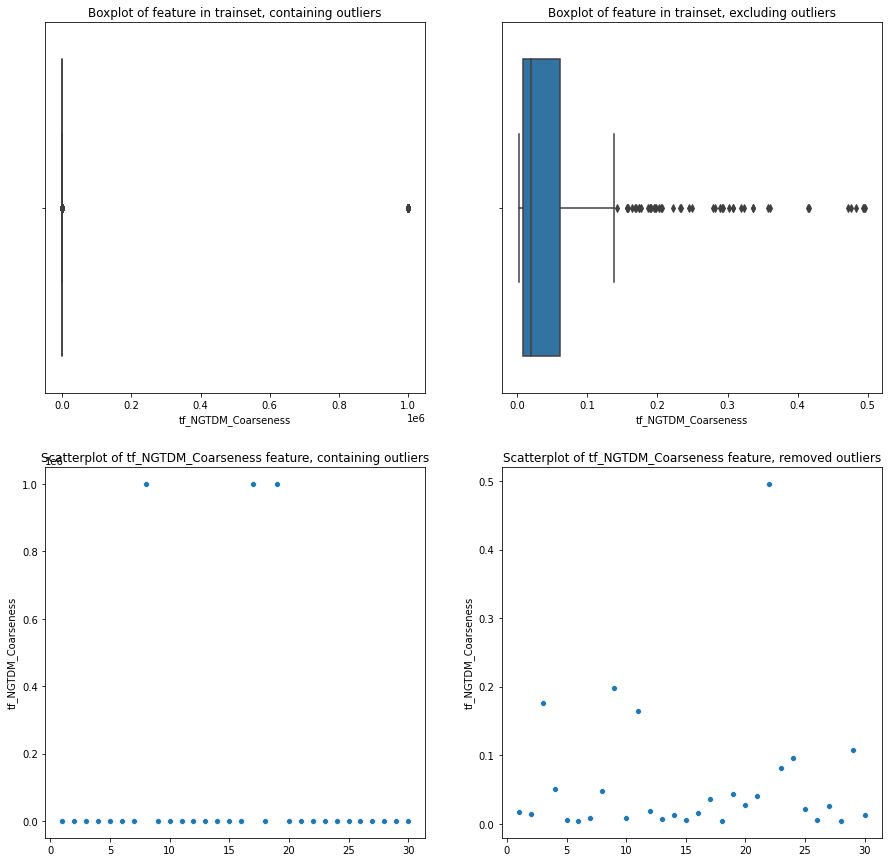

In [0]:
# Visualisation of one feature with and without outliers
_, axes = plt.subplots(2, 2, figsize=(15,15))

axes[0,0].set_title('Boxplot of feature in trainset, containing outliers')
axes[0,1].set_title('Boxplot of feature in trainset, excluding outliers')
_ = sns.boxplot(X_train_final['tf_NGTDM_Coarseness'], ax=axes[0,0])
_ = sns.boxplot(X_train_new['tf_NGTDM_Coarseness'], ax=axes[0,1])
_ = sns.scatterplot(x=list(range(1, 31)), y=X_train_final.iloc[:30, 221], ax=axes[1,0])
_ = sns.scatterplot(x=list(range(1, 31)), y=X_train_new.iloc[:30, 221], ax=axes[1,1])
axes[1,0].set_title('Scatterplot of tf_NGTDM_Coarseness feature, containing outliers')
axes[1,1].set_title('Scatterplot of tf_NGTDM_Coarseness feature, removed outliers')

>Evaluate accuracy after outlier removal through. So we get an indication of the advantage obtained with outlier removal

In [0]:
cv_20fold = StratifiedKFold(n_splits=20)

SVC_scores = []
KNN_scores = []
RF_scores = []

for train_index, val_index in cv_20fold.split(X_train_final, y_train):

    X_train_e2 = X_train_final.iloc[train_index]
    y_train_e2 = y_train.iloc[train_index]
    X_val = X_train_final.iloc[val_index]
    y_val = y_train.iloc[val_index]

    # Labeling and removing the rows in which they are located
    Q1 = X_train_e2.quantile(0.10)
    Q3 = X_train_e2.quantile(0.90) 
    IQR = Q3 - Q1
    X_train_new_e2 = X_train_e2[~((X_train_e2 < (Q1 - 1.5 * IQR)) |(X_train_e2 > (Q3 + 1.5 * IQR))).any(axis=1)]
    X_val_new = X_val[~((X_val < (Q1 - 1.5 * IQR)) |(X_val > (Q3 + 1.5 * IQR))).any(axis=1)]

    # Adjust y_train_e1 and y_test to X_train_final and X_test_final
    index_train = X_train_e2.index.difference(X_train_new_e2.index) 
    y_train_e2_new = y_train_e2.drop(index_train) 
    index_test = X_val.index.difference(X_val_new.index) 
    y_val_new = y_val.drop(index_test) 

    # Evaluate outlier removal method using default classifiers:
    clf = SVC(gamma='auto')
    clf.fit(X_train_new_e2, y_train_e2_new)
    y_pred_val = clf.predict(X_val_new) 
    accuracy_val = metrics.accuracy_score(y_val_new, y_pred_val)
    SVC_scores.append(accuracy_val)

    clf = KNeighborsClassifier()
    clf.fit(X_train_new_e2, y_train_e2_new)
    y_pred_val = clf.predict(X_val_new) 
    accuracy_val = metrics.accuracy_score(y_val_new, y_pred_val)
    KNN_scores.append(accuracy_val)

    clf = RandomForestClassifier()
    clf.fit(X_train_new_e2, y_train_e2_new)
    y_pred_val = clf.predict(X_val_new) 
    accuracy_val = metrics.accuracy_score(y_val_new, y_pred_val)
    RF_scores.append(accuracy_val)

print('cv_20fold_split performed on data without outliers (IQR method): \n')
print(f'Mean accuracy of SVC classifier on validation data: {sum(SVC_scores)/len(SVC_scores)}')
print(f'Mean accuracy of KNN classifier on validation data: {sum(KNN_scores)/len(KNN_scores)}')
print(f'Mean accuracy of RF classifier on validation data: {sum(RF_scores)/len(RF_scores)}')

cv_20fold_split performed on data without outliers (IQR method): 

Mean accuracy of SVC classifier on validation data: 0.6146706142888878
Mean accuracy of KNN classifier on validation data: 0.6495816960222915
Mean accuracy of RF classifier on validation data: 0.7938843148682228


> #### Other option
Detect and remove outliers based on z-score method

In [0]:
# Option 2:

# Labeling and removing the rows in which they are located, through the z_score method 
X_train_new_mean = X_train_final[(np.abs(stats.zscore(X_train_final)) < 3).all(axis=1)]
X_test_new_mean = X_test_final[(np.abs(stats.zscore(X_test_final)) < 3).all(axis=1)]

# Adjust y_train and y_test to X_train_final and X_test_final
index_train = X_train_final.index.difference(X_train_new_mean.index) 
y_train_new_mean = y_train.drop(index_train) 
index_train = X_test_final.index.difference(X_test_new_mean.index) 
y_test_new_mean = y_test.drop(index_train) 

# Display the old and new DataFrame shapes
print('Shape = (rows, columns)')
print(f'Shape of X_train_final: {X_train_final.shape}, shape of X_test_final: {X_test_final.shape}')
print(f'Shape of y_train: {y_train.shape}, shape of y_test: {y_test.shape}')
print(f'Shape of X_train_new_mean: {X_train_new_mean.shape}, shape of X_test_new_mean: {X_test_new_mean.shape}')
print(f'Shape of y_train: {y_train_new_mean.shape}, shape of y_test: {y_test_new_mean.shape}')

# Check whether z_score method does not create new NaN values
print(f'There are {X_train_new_mean.isnull().T.any().T.sum()} NaN values in X_train_new_mean')
print(f'There are {X_test_new_mean.isnull().T.any().T.sum()} NaN values in X_test_new_mean')

## returns an empty dataframe X_train_new_mean .... ## ---> therefore not a good option, have to use median

Shape = (rows, columns)
Shape of X_train_final: (684, 261), shape of X_test_final: (171, 261)
Shape of y_train: (684,), shape of y_test: (171,)
Shape of X_train_new_mean: (0, 261), shape of X_test_new_mean: (0, 261)
Shape of y_train: (0,), shape of y_test: (0,)
There are 0 NaN values in X_train_new_mean
There are 0 NaN values in X_test_new_mean


/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:2419: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in less
  


## Scaling the data
*   Option 1: Scale the features properly through StandarScaler()
*   Option 2: Scale the features properly through MinMaxScaler()
*   Option 3: Scale the features properly through RobustScaler()

>#### **Used** option
Scale the features properly through MinMaxscaler(). 

In [0]:
# Option 1:

# Scale the features properly through MinMaxScaler()
scaler = MinMaxScaler()
scaler.fit(X_train_new)
X_train_scaled = pd.DataFrame(data=scaler.transform(X_train_new), index=X_train_new.index, columns=X_train_new.columns)
X_test_scaled = pd.DataFrame(data=scaler.transform(X_test_new), index=X_test_new.index, columns=X_test_new.columns)

# Display the old and new DataFrame shapes
print('Shape = (rows, columns)')
print(f'Shape of X_train_new: {X_train_new.shape}, shape of X_test_new: {X_test_new.shape}')
print(f'Shape of X_train_scaled: {X_train_scaled.shape}, shape of X_test_scaled: {X_test_scaled.shape}')

Shape = (rows, columns)
Shape of X_train_new: (492, 261), shape of X_test_new: (126, 261)
Shape of X_train_scaled: (492, 261), shape of X_test_scaled: (126, 261)


>Visualization (scatterplot) of two scaled and non-scaled features. To check whether scaling method is correct.

Text(0.5, 1.0, 'MinMaxscaler() data: Scatterplot of 2 features')

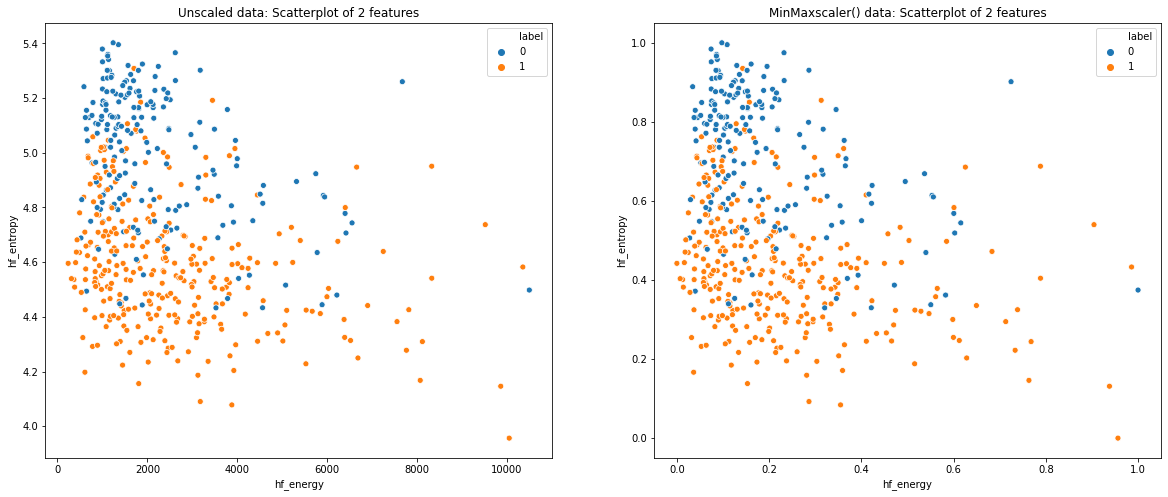

In [0]:
# Visualization of scaling the data 
_, axes = plt.subplots(1, 2, figsize=(20,8))
_ = sns.scatterplot(x=X_train_new.iloc[:,0], y=X_train_new.iloc[:,1], hue=y_train_new, data=X_train_new, ax=axes[0], hue_order=(0, 1))
_ = sns.scatterplot(x=X_train_scaled.iloc[:,0], y=X_train_scaled.iloc[:,1], hue=y_train_new, data=X_train_scaled, ax=axes[1], hue_order=(0, 1))
axes[0].set_title('Unscaled data: Scatterplot of 2 features')
axes[1].set_title('MinMaxscaler() data: Scatterplot of 2 features') 

>Evaluate accuracy after scaling of data. So we get an indication of the advantage obtained with scaling of the data.

In [0]:
# Evaluation of MinMaxscaler through cv_20fold_split

cv_20fold = StratifiedKFold(n_splits=20)

SVC_scores = []
KNN_scores = []
RF_scores = []

for train_index, val_index in cv_20fold.split(X_train_new, y_train_new):

    X_train_e1 = X_train_new.iloc[train_index]
    y_train_e3 = y_train_new.iloc[train_index]
    X_val = X_train_new.iloc[val_index]
    y_val = y_train_new.iloc[val_index]
      
    # Scale the features properly through MinMaxscaler()
    scaler = MinMaxScaler()
    scaler.fit(X_train_e1)
    X_train_scaled_e1 = pd.DataFrame(data=scaler.transform(X_train_e1), index=X_train_e1.index, columns=X_train_e1.columns)
    X_val_scaled = pd.DataFrame(data=scaler.transform(X_val), index=X_val.index, columns=X_val.columns)

    # Evaluate scaling method using default classifiers:
    clf = SVC(gamma='auto')
    clf.fit(X_train_scaled_e1, y_train_e3)
    y_pred_val = clf.predict(X_val_scaled) 
    accuracy_val = metrics.accuracy_score(y_val, y_pred_val)
    SVC_scores.append(accuracy_val)

    clf = KNeighborsClassifier()
    clf.fit(X_train_scaled_e1, y_train_e3)
    y_pred_val = clf.predict(X_val_scaled) 
    accuracy_val = metrics.accuracy_score(y_val, y_pred_val)
    KNN_scores.append(accuracy_val)

    clf = RandomForestClassifier()
    clf.fit(X_train_scaled_e1, y_train_e3)
    y_pred_val = clf.predict(X_val_scaled) 
    accuracy_val = metrics.accuracy_score(y_val, y_pred_val)
    RF_scores.append(accuracy_val)

print('cv_20fold_split performed on scaled data (MinMaxscaler method): \n')
print(f'Mean accuracy of SVC classifier on validation data: {sum(SVC_scores)/len(SVC_scores)}')
print(f'Mean accuracy of KNN classifier on validation data: {sum(KNN_scores)/len(KNN_scores)}')
print(f'Mean accuracy of RF classifier on validation data: {sum(RF_scores)/len(RF_scores)}')

cv_20fold_split performed on scaled data (MinMaxscaler method): 

Mean accuracy of SVC classifier on validation data: 0.7887500000000001
Mean accuracy of KNN classifier on validation data: 0.7741666666666667
Mean accuracy of RF classifier on validation data: 0.8073333333333335


>#### Other options
Scaling through Standardscaler() and RobustScaler(). Includes evaluation and visualization.


cv_20fold_split performed on scaled data (Standardscaler method): 

Mean accuracy of SVC classifier on validation data: 0.7948333333333333
Mean accuracy of KNN classifier on validation data: 0.7825833333333333
Mean accuracy of RF classifier on validation data: 0.7906666666666665

cv_20fold_split performed on scaled data (RobustScaler method): 

Mean accuracy of SVC classifier on validation data: 0.7909166666666667
Mean accuracy of KNN classifier on validation data: 0.7518333333333334
Mean accuracy of RF classifier on validation data: 0.8089166666666667


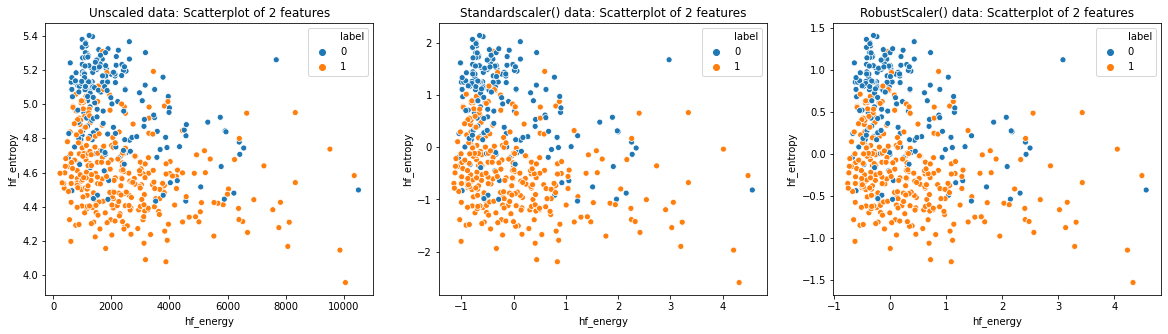

In [0]:
# Visualization of scaling the data 
_, axes = plt.subplots(1, 3, figsize=(20,5))
plot = sns.scatterplot(x=X_train_new.iloc[:,0], y=X_train_new.iloc[:,1], hue=y_train_new, data=X_train_new, ax=axes[0], hue_order=(0, 1))
axes[0].set_title('Unscaled data: Scatterplot of 2 features')
axes[1].set_title('Standardscaler() data: Scatterplot of 2 features')
axes[2].set_title('RobustScaler() data: Scatterplot of 2 features')

# Evaluation of StanderdScaler through cv_20fold_split
cv_20fold = StratifiedKFold(n_splits=20)

SVC_scores = []
KNN_scores = []
RF_scores = []

for train_index, val_index in cv_20fold.split(X_train_new, y_train_new):

    X_train_e3 = X_train_new.iloc[train_index]
    y_train_e3 = y_train_new.iloc[train_index]
    X_val = X_train_new.iloc[val_index]
    y_val = y_train_new.iloc[val_index]
      
    # Scale the features properly through Standardscaler()
    scaler = StandardScaler()
    scaler.fit(X_train_e3)
    X_train_scaled_e3 = pd.DataFrame(data=scaler.transform(X_train_e3), index=X_train_e3.index, columns=X_train_e3.columns)
    X_val_scaled = pd.DataFrame(data=scaler.transform(X_val), index=X_val.index, columns=X_val.columns)

    # Evaluate scaling method using default classifiers:
    clf = SVC(gamma='auto')
    clf.fit(X_train_scaled_e3, y_train_e3)
    y_pred_val = clf.predict(X_val_scaled) 
    accuracy_val = metrics.accuracy_score(y_val, y_pred_val)
    SVC_scores.append(accuracy_val)

    clf = KNeighborsClassifier()
    clf.fit(X_train_scaled_e3, y_train_e3)
    y_pred_val = clf.predict(X_val_scaled) 
    accuracy_val = metrics.accuracy_score(y_val, y_pred_val)
    KNN_scores.append(accuracy_val)

    clf = RandomForestClassifier()
    clf.fit(X_train_scaled_e3, y_train_e3)
    y_pred_val = clf.predict(X_val_scaled) 
    accuracy_val = metrics.accuracy_score(y_val, y_pred_val)
    RF_scores.append(accuracy_val)

print('\ncv_20fold_split performed on scaled data (Standardscaler method): \n')
print(f'Mean accuracy of SVC classifier on validation data: {sum(SVC_scores)/len(SVC_scores)}')
print(f'Mean accuracy of KNN classifier on validation data: {sum(KNN_scores)/len(KNN_scores)}')
print(f'Mean accuracy of RF classifier on validation data: {sum(RF_scores)/len(RF_scores)}')
plot = sns.scatterplot(x=X_train_scaled_e3.iloc[:,0], y=X_train_scaled_e3.iloc[:,1], hue=y_train_new, data=X_train_scaled_e3, ax=axes[1], hue_order=(0, 1))

# Evaluation of RobustScaler through cv_20fold_split
cv_20fold = StratifiedKFold(n_splits=20)

SVC_scores = []
KNN_scores = []
RF_scores = []

for train_index, val_index in cv_20fold.split(X_train_new, y_train_new):

    X_train_e3 = X_train_new.iloc[train_index]
    y_train_e3 = y_train_new.iloc[train_index]
    X_val = X_train_new.iloc[val_index]
    y_val = y_train_new.iloc[val_index]
      
    # Scale the features properly through RobustScaler()
    scaler = RobustScaler()
    scaler.fit(X_train_e3)
    X_train_scaled_e3 = pd.DataFrame(data=scaler.transform(X_train_e3), index=X_train_e3.index, columns=X_train_e3.columns)
    X_val_scaled = pd.DataFrame(data=scaler.transform(X_val), index=X_val.index, columns=X_val.columns)

    # Evaluate scaling method using default classifiers:
    clf = SVC(gamma='auto')
    clf.fit(X_train_scaled_e3, y_train_e3)
    y_pred_val = clf.predict(X_val_scaled) 
    accuracy_val = metrics.accuracy_score(y_val, y_pred_val)
    SVC_scores.append(accuracy_val)

    clf = KNeighborsClassifier()
    clf.fit(X_train_scaled_e3, y_train_e3)
    y_pred_val = clf.predict(X_val_scaled) 
    accuracy_val = metrics.accuracy_score(y_val, y_pred_val)
    KNN_scores.append(accuracy_val)

    clf = RandomForestClassifier()
    clf.fit(X_train_scaled_e3, y_train_e3)
    y_pred_val = clf.predict(X_val_scaled) 
    accuracy_val = metrics.accuracy_score(y_val, y_pred_val)
    RF_scores.append(accuracy_val)

print('\ncv_20fold_split performed on scaled data (RobustScaler method): \n')
print(f'Mean accuracy of SVC classifier on validation data: {sum(SVC_scores)/len(SVC_scores)}')
print(f'Mean accuracy of KNN classifier on validation data: {sum(KNN_scores)/len(KNN_scores)}')
print(f'Mean accuracy of RF classifier on validation data: {sum(RF_scores)/len(RF_scores)}')
plot = sns.scatterplot(x=X_train_scaled_e3.iloc[:,0], y=X_train_scaled_e3.iloc[:,1], hue=y_train_new, data=X_train_scaled_e3, ax=axes[2], hue_order=(0, 1))

## Learning curves
Learning curves are plotted to visualise complexity

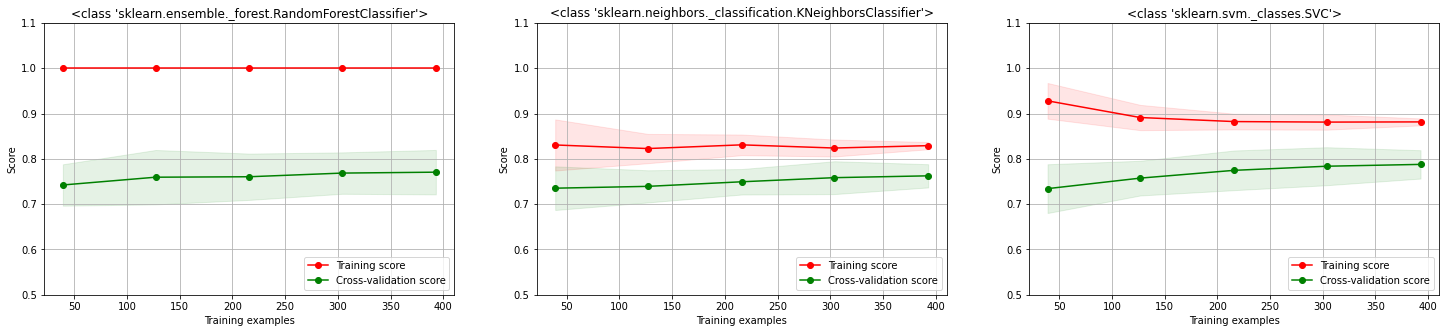

In [0]:
# Function to create learning curves 

def plot_learning_curve(estimator, title, X, y, axes, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):

    axes.set_title(title)
    if ylim is not None:
        axes.set_ylim(*ylim)
    axes.set_xlabel("Training examples")
    axes.set_ylabel("Score")

    train_sizes, train_scores, test_scores  = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plot learning curve
    axes.grid()
    axes.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes.legend(loc=4)

    return plt

# create cv
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

clsfs = [RandomForestClassifier(), KNeighborsClassifier(), SVC()]

# apply function
fig = plt.figure(figsize=(25,5))
num = 0
for clf in clsfs:
    title = str(type(clf))
    ax = fig.add_subplot(1, 3, num + 1)
    plot_learning_curve(clf, title, X_train_scaled, y_train_new, ax, ylim=(0.5, 1.1), cv=cv)
    num += 1

## Feature selection

Optimal number of features computed with random feature extraction cross validation

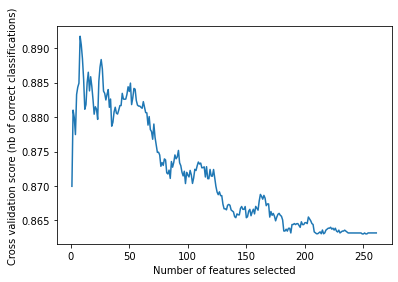

The number of selected features is 8


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.970036621818247, tolerance: 0.00928261964735517
  positive)


mean accuracy is [0.7466666666666667, 0.7633333333333333, 0.6833333333333332]


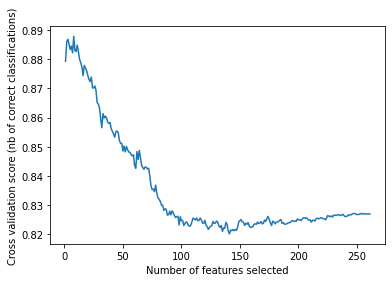

The number of selected features is 8


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.554615477600565, tolerance: 0.00928261964735517
  positive)


mean accuracy is [0.7799999999999999, 0.79, 0.7566666666666667]


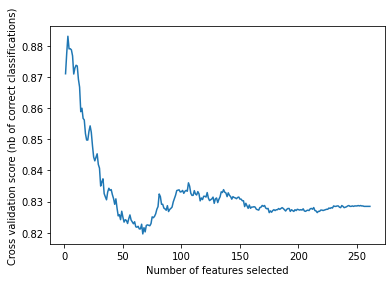

The number of selected features is 3


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.34380138265777, tolerance: 0.0092964824120603
  positive)


mean accuracy is [0.787878787878788, 0.8013468013468014, 0.7104377104377105]


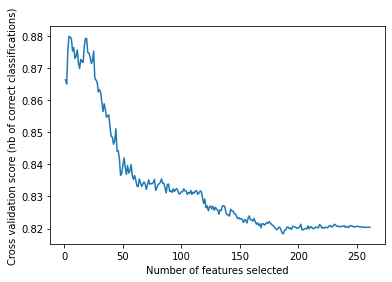

The number of selected features is 4


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.964024712112494, tolerance: 0.009296482412060299
  positive)


mean accuracy is [0.8282828282828283, 0.8316498316498316, 0.787878787878788]


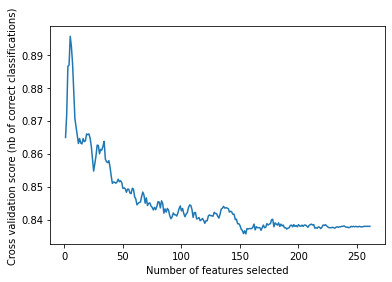

The number of selected features is 5


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.13475411025533, tolerance: 0.009296482412060299
  positive)


mean accuracy is [0.808080808080808, 0.8148148148148148, 0.6969696969696969]
[1, 1, 1, 1, 1]
1
['hf_entropy', 'hf_peak', 'tf_Gabor_0.05A0.0min', 'tf_Gabor_0.05A0.0skew', 'tf_Gabor_0.2A0.79min', 'tf_LBP_std_R3_P12']
The number of selected features is 6


In [0]:
# Splitting in train and validation set 
cv_5fold = StratifiedKFold(n_splits=5)

index_fold = list()
for train_index, validation_index in cv_5fold.split(X_train_scaled, y_train_new):

    X_train = X_train_scaled.iloc[train_index]
    y_train = y_train_new.iloc[train_index]
    X_validation = X_train_scaled.iloc[validation_index]
    y_validation = y_train_new.iloc[validation_index]
    
    # Optimal number of features 
    svc = SVC(kernel="linear")
    rfecv = feature_selection.RFECV(
        estimator=svc, step=1, 
        cv=model_selection.StratifiedKFold(5),
        scoring='roc_auc',min_features_to_select=1)
    rfecv.fit(X_train, y_train)

    # Plot number of features VS. cross-validation scores
    plt.figure()
    plt.xlabel("Number of features selected")
    plt.ylabel("Cross validation score (nb of correct classifications)")
    plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
    plt.show()

    # Select optimal frecv features
    features = [f for f,s in zip(X_train.columns, rfecv.support_) if s]
    X_train_feat = X_train[features]
    X_val_feat = X_validation[features]
    print(f'The number of selected features is {len(features)}')

    # Perform a PCA
    pca = PCA()
    pca.fit(X_train_feat)
    X_train_feat_pca = pca.transform(X_train_feat)
    X_val_feat_pca = pca.transform(X_val_feat)

    # Select optimal features Lasso 
    selector = feature_selection.SelectFromModel(estimator=Lasso(alpha=10**(-10), random_state=42), 
                               threshold=-np.inf, max_features=len(features))
    selector.fit(X_train, y_train)
    X_train_Lasso = selector.transform(X_train)
    X_val_Lasso = selector.transform(X_validation)

    clfs = [SVC(gamma='auto'), KNeighborsClassifier(), RandomForestClassifier()]
    X_train_data = [X_train_feat, X_train_feat_pca, X_train_Lasso]
    X_val_data = [X_val_feat, X_val_feat_pca, X_val_Lasso]
    text_data = [' Accuracy without PCA', ' Accuracy after PCA', 
                 ' Accuracy Lasso with different features']
    mean_acc = list()
    for X_train, X_val, text in zip(X_train_data, X_val_data, text_data):
        acc_method = list()
        for clf in clfs:
            clf.fit(X_train, y_train)
            y_pred_train = clf.predict(X_train)
            y_pred_val = clf.predict(X_val)
            accuracy_train = metrics.accuracy_score(y_train, y_pred_train)
            accuracy_validation = metrics.accuracy_score(y_validation, y_pred_val)
            acc_method.append(accuracy_validation)
        mean_acc.append(sum(acc_method)/3)
    print(f'mean accuracy is {mean_acc}')
    index = mean_acc.index(max(mean_acc))
    index_fold.append(index)

print(index_fold)
method = max(set(index_fold), key = index_fold.count)
print(method)

# Optimal number of features 
svc = SVC(kernel="linear")
rfecv = feature_selection.RFECV(
    estimator=svc, step=1, 
    cv=model_selection.StratifiedKFold(5),
    scoring='roc_auc',min_features_to_select=1)
rfecv.fit(X_train_scaled, y_train_new)

if method == 0 or 1:
    # Select optimal frecv features
    features = [f for f,s in zip(X_train_scaled.columns, rfecv.support_) if s]
    print(features)
    X_train = X_train_scaled[features]
    X_test = X_test_scaled[features]
    print(f'The number of selected features is {len(features)}')

    if method == 1:
        # Perform a PCA
        pca = PCA()
        pca.fit(X_train)
        X_train = pca.transform(X_train)
        X_test = pca.transform(X_test)

if method == 2:
    # Select optimal features Lasso 
    selector = SelectFromModel(estimator=Lasso(alpha=10**(-10), random_state=42), threshold=-np.inf, max_features=len(features))
    selector.fit(X_train_scaled, y_train_new)
    X_train = selector.transform(X_train_scaled)
    X_test = selector.transform(X_test_scaled)

## Classifiers and hyperparameters


*   Classifier 1: Support Vector Machine (SVM)
*   Classifier 2: K-nearest neighbour (KNN)
*   Classifier 3: Random Forest (RF)

The hyperparameters are optimized using RandomizedSearchCV()



In [0]:
# Hyperparameters

svmlin = {'kernel': ["linear","poly","rbf","sigmoid"], 'degree' : list(range(1,6))} 
KNN = {'weights': ["uniform", "distance"], 'n_neighbors': list(range(1, 20))}
RF = {'n_estimators': list(range(1, 400)), 'bootstrap': ["True", "False"], 'class_weight': [None, "balanced"]}

# Now use the classifiers on all datasets
fitted_clfs = list()

# SVM
clf = RandomizedSearchCV(SVC(probability=True), svmlin, n_iter=10, cv=5)
clf.fit(X_train, y_train_new)
fitted_clfs.append(clf)

# KNN
clf = RandomizedSearchCV(KNeighborsClassifier(), KNN, n_iter=10, cv=5)
clf.fit(X_train, y_train_new)
fitted_clfs.append(clf)

# RF
clf = RandomizedSearchCV(RandomForestClassifier(), RF, n_iter=10, cv=5)
clf.fit(X_train, y_train_new)
fitted_clfs.append(clf)

# Get the best estimator and best parameters belonging to that estimator
clsfs = list()
for num, clf in enumerate(fitted_clfs):
    print(f'\n The best parameters for classifier {num+1} are:')
    print(f'\t {clf.best_params_}')
    clsfs.append(clf.best_estimator_)


 The best parameters for classifier 1 are:
	 {'kernel': 'poly', 'degree': 1}

 The best parameters for classifier 2 are:
	 {'weights': 'uniform', 'n_neighbors': 11}

 The best parameters for classifier 3 are:
	 {'n_estimators': 41, 'class_weight': None, 'bootstrap': 'False'}


## Statistics

Final statistics on the results of the classifiers. The accuracy of the train and testset are calculated and the amount of misclassifications.

Train misclassified: (84, 497)
Test misclassified: (20, 117)
accuracy trainset: 0.8309859154929577
accuracy testset: 0.8290598290598291


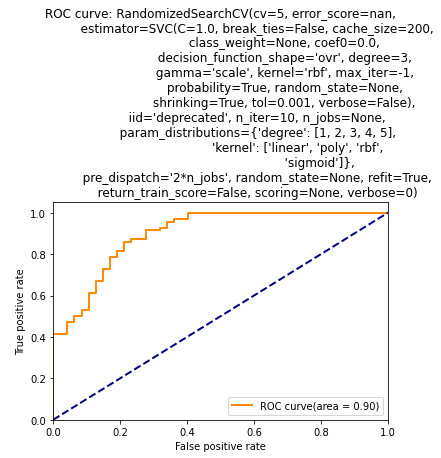

Train misclassified: (0, 497)
Test misclassified: (21, 117)
accuracy trainset: 1.0
accuracy testset: 0.8205128205128205


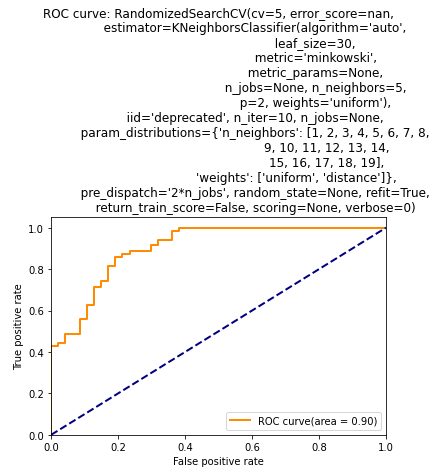

Train misclassified: (0, 497)
Test misclassified: (23, 117)
accuracy trainset: 1.0
accuracy testset: 0.8034188034188035


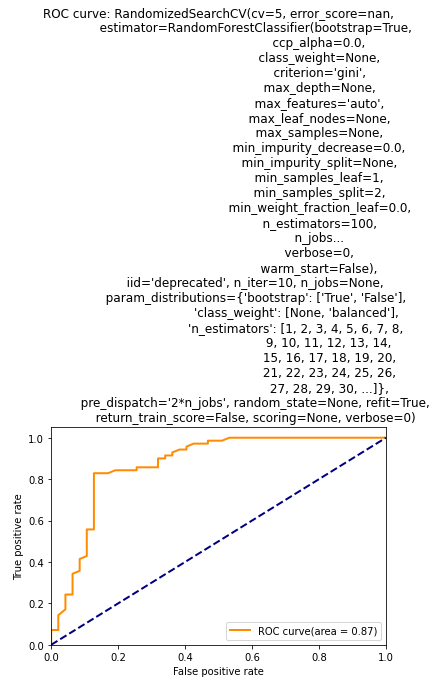

In [0]:
# Computation of accuracy for the three optimized classifiers
fpr = dict()
tpr = dict()
roc_auc = dict()

for clf in fitted_clfs:
  clf.fit(X_train,y_train_new)                                                          
  y_pred_train = clf.predict(X_train)
  y_pred_test = clf.predict(X_test)
  y_score = clf.predict_proba(X_test)
  print(f'Train misclassified: {(y_train_new != y_pred_train).sum(), X_train.shape[0]}')
  print(f'Test misclassified: {(y_test_new != y_pred_test).sum(), X_test.shape[0]}')
  accuracy_train = metrics.accuracy_score(y_train_new, y_pred_train)
  accuracy_test = metrics.accuracy_score(y_test_new, y_pred_test)     
  print(f'accuracy trainset: {accuracy_train}') 
  print(f'accuracy testset: {accuracy_test}')

  fpr, tpr, _ = roc_curve(y_test_new, y_score[:,1])
  roc_auc = auc(fpr,tpr)
  plt.figure()
  lw=2
  plt.plot(fpr, tpr, color = "darkorange", lw=lw, label="ROC curve(area = %0.2f)" % roc_auc)
  plt.plot([0,1],[0,1], color = 'navy', lw=lw, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False positive rate')
  plt.ylabel('True positive rate')
  plt.title(f'ROC curve: {clf}')
  plt.legend(loc='lower right')
  plt.show()

#**Run entire script at once:**

In [0]:
# Run this to use from colab environment
!pip install -q --upgrade git+https://github.com/karinvangarderen/tm10007_project.git

# General packages 
import pandas as pd
import numpy as np
import seaborn as sns
 
# load data
from adni.load_data import load_data
 
# Splitting the data
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
 
# Handling missing data
from sklearn.impute import SimpleImputer
 
# Removing outliers 
import matplotlib.pyplot as plt
from scipy import stats
 
# Scaling the data
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler 
 
# Learning curves
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve
 
# Feature selection
from sklearn import model_selection
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso
from sklearn.decomposition import PCA
from sklearn import feature_selection 
 
# Classifiers 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
import random
 
# Statistics
from sklearn import metrics
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import roc_curve, auc

# Visualise learning curves
def plot_learning_curve(estimator, title, X, y, axes, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
  
  axes.set_title(title)
  if ylim is not None:
    axes.set_ylim(*ylim)
  axes.set_xlabel("Training examples")
  axes.set_ylabel("Score")
  train_sizes, train_scores, test_scores  = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
  train_scores_mean = np.mean(train_scores, axis=1)
  train_scores_std = np.std(train_scores, axis=1)
  test_scores_mean = np.mean(test_scores, axis=1)
  test_scores_std = np.std(test_scores, axis=1)

  axes.grid()
  axes.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
  axes.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
  axes.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
  axes.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
  axes.legend(loc=4)
  return plt

# Data reading              
df = load_data()

# Selecting x and y
X = df.drop('label', axis=1)
y = df['label']
y = y.map({"AD": 1, "CN": 0})

# initialising list with results            
accuracies = list()

# initializing number of loop counts
number_of_loops_outer = 0 
number_of_loops_inner = 0

# Splitting data
cv_20fold = StratifiedKFold(n_splits=20)

for train_index, test_index in cv_20fold.split(X, y):

    X_train_cv = X.iloc[train_index]
    y_train_cv = y.iloc[train_index]
    X_test_cv = X.iloc[test_index]
    y_test_cv = y.iloc[test_index]

    #Imputation

    # Replace zero values with NaN values
    X_train_NaN = X_train_cv.replace(0, np.NaN)
    X_test_NaN = X_test_cv.replace(0, np.NaN)

    cv_5fold = StratifiedKFold(n_splits=5)
    index_fold = list()
    clas = list()
    acc = list()
    features_lst = list()

    number_of_loops_outer += 1
    print(f'\nIteration number: {number_of_loops_outer}\n')

    # Splitting in train and validation set 
    for train_index, validation_index in cv_5fold.split(X_train_NaN, y_train_cv):

        X_train = X_train_NaN.iloc[train_index]
        y_train = y_train_cv.iloc[train_index]
        X_val = X_train_NaN.iloc[validation_index]
        y_val = y_train_cv.iloc[validation_index]

        number_of_loops_inner += 1
        
        # Keep columns with at least 50% no-NaN values (eliminate columns with more than 50% NaN values)
        X_train_NaN_tresh = X_train.dropna(axis='columns', thresh=int(len(X_train.index)/2))
        index_val = X_train_NaN_tresh.columns
        X_val_NaN_tresh = X_val[index_val]

        #imputate zeros with median column value 
        imp = SimpleImputer(strategy='median')
        imp.fit(X_train_NaN_tresh)
        X_train_imp = imp.transform(X_train_NaN_tresh)
        X_val_imp = imp.transform(X_val_NaN_tresh)

        # Return array to a DataFrame
        X_train_final = pd.DataFrame(data=X_train_imp, index=X_train_NaN_tresh.index, columns=X_train_NaN_tresh.columns)
        X_val_final = pd.DataFrame(data=X_val_imp, index=X_val_NaN_tresh.index, columns=X_val_NaN_tresh.columns)

        # Detect and remove outliers based on interquartile range (IQR) method
        # Labeling and removing the rows in which they are located
        Q1 = X_train_final.quantile(0.10)
        Q3 = X_train_final.quantile(0.90) 
        IQR = Q3 - Q1
        X_train_new = X_train_final[~((X_train_final < (Q1 - 1.5 * IQR)) |(X_train_final > (Q3 + 1.5 * IQR))).any(axis=1)]
        X_val_new = X_val_final[~((X_val_final < (Q1 - 1.5 * IQR)) |(X_val_final > (Q3 + 1.5 * IQR))).any(axis=1)]

        # Adjust y_train and y_test to X_train_final and X_test_final
        index_train = X_train_final.index.difference(X_train_new.index) 
        y_train = y_train.drop(index_train) 
        index_val = X_val_final.index.difference(X_val_new.index) 
        y_val = y_val.drop(index_val) 

        # Scaling

        #Scale the features properly through MinMaxScaler()
        scaler = MinMaxScaler()
        scaler.fit(X_train_new)
        X_train = pd.DataFrame(data=scaler.transform(X_train_new), index=X_train_new.index, columns=X_train_new.columns)
        X_validation = pd.DataFrame(data=scaler.transform(X_val_new), index=X_val_new.index, columns=X_val_new.columns)
            
        # Optimal number of features 
        svc = SVC(kernel="linear")
        rfecv = feature_selection.RFECV(
            estimator=svc, step=1, 
            cv=model_selection.StratifiedKFold(5),
            scoring='roc_auc',min_features_to_select=1)
        rfecv.fit(X_train, y_train)

        # Select optimal frecv features
        features = [f for f,s in zip(X_train.columns, rfecv.support_) if s]
        features_lst.append(features)
        X_train_feat = X_train[features]
        X_val_feat = X_validation[features]

        # Perform a PCA
        pca = PCA()
        pca.fit(X_train_feat)
        X_train_feat_pca = pca.transform(X_train_feat)
        X_val_feat_pca = pca.transform(X_val_feat)

        # Visualisation of data distribution, outlier removal, data scaling, PCA and Learningcurves
        
        if number_of_loops_inner == 1:
          _, axes = plt.subplots(4, 2, figsize=(15,20))

          axes[0,0].set_title('Boxplot of feature in trainset, containing outliers')
          axes[0,1].set_title('Boxplot of feature in trainset, excluding outliers')
          _ = sns.boxplot(X_train_final['tf_NGTDM_Coarseness'], ax=axes[0,0])
          _ = sns.boxplot(X_train['tf_NGTDM_Coarseness'], ax=axes[0,1])

          axes[1,0].set_title('Histogram of hf_energy feature in trainset') 
          axes[1,1].set_title('Histogram of hf_entropy feature in trainset') 
          axes[1,0].hist(X_train_new['hf_energy'])
          axes[1,1].hist(X_train_new['hf_entropy'])

          axes[2,0].set_title('Scatterplot of 2 features in trainset, unscaled')
          axes[2,1].set_title('Scatterplot of 2 features in trainset, scaled through MinMax scaling')
          _ = sns.scatterplot(x=X_train_new.iloc[:,0], y=X_train_new.iloc[:,1], hue=y_train, data=X_train_new, ax=axes[2,0], hue_order=(0, 1))
          _ = sns.scatterplot(x=X_train.iloc[:,0], y=X_train.iloc[:,1], hue=y_train, data=X_train, ax=axes[2,1], hue_order=(0, 1))
          
          axes[3,0].set_title('Scatterplot of 2 features in trainset, non PCA performed')
          axes[3,1].set_title('Scatterplot of 2 features in trainset, PCA performed')
          _ = sns.scatterplot(x=X_train_feat.iloc[:,0], y=X_train_feat.iloc[:,1], hue=y_train, data=X_train_feat, ax=axes[3,0], hue_order=(0, 1))
          X_train_feat_pca_vis = pd.DataFrame(data=X_train_feat_pca, index=X_train_feat.index, columns=X_train_feat.columns)
          _ = sns.scatterplot(x=X_train_feat_pca_vis.iloc[:,0], y=X_train_feat_pca_vis.iloc[:,1], hue=y_train, data=X_train_feat_pca_vis, ax=axes[3,1], hue_order=(0, 1))

          # Visualisation learning curve
          clsfs = [RandomForestClassifier(), KNeighborsClassifier(), SVC()]

          # apply function
          fig = plt.figure(figsize=(25,5))
          num = 0
          for clf in clsfs:
              title = str(type(clf))
              ax = fig.add_subplot(1, 3, num + 1)
              plot_learning_curve(clf, title, X_train, y_train, ax, ylim=(0.1, 1.1), cv=StratifiedKFold(n_splits=20))
              num += 1

        # Select optimal features Lasso 
        selector = feature_selection.SelectFromModel(estimator=Lasso(alpha=10**(-10), random_state=42), threshold=-np.inf, max_features=len(features))
        selector.fit(X_train, y_train)
        X_train_Lasso = selector.transform(X_train)
        X_val_Lasso = selector.transform(X_validation)

        clfs = [SVC(gamma='auto'), KNeighborsClassifier(), RandomForestClassifier()]
        X_train_data = [X_train_feat, X_train_feat_pca, X_train_Lasso]
        X_val_data = [X_val_feat, X_val_feat_pca, X_val_Lasso]
        text_data = [' Accuracy without PCA', ' Accuracy after PCA', 
                  ' Accuracy Lasso with different features']
        mean_acc = list()
        for X_train, X_val, text in zip(X_train_data, X_val_data, text_data):
            acc_method = list()
            for clf in clfs:
                clf.fit(X_train, y_train)
                y_pred_train = clf.predict(X_train)
                y_pred_val = clf.predict(X_val)
                accuracy_train = metrics.accuracy_score(y_train, y_pred_train)
                accuracy_validation = metrics.accuracy_score(y_val, y_pred_val)
                acc_method.append(accuracy_validation)
            mean_acc.append(sum(acc_method)/3)
        index = mean_acc.index(max(mean_acc))
        index_fold.append(index)

        if index == 0:
            X_train = X_train_feat
            X_val = X_val_feat

        if index == 1:
            X_train = X_train_feat_pca
            X_val = X_val_feat_pca

        if index == 2:
            X_train = X_train_Lasso
            X_val = X_val_Lasso

        ##hyperparameters and classifiers##
        # Our parameter to optimize is the number of estimators, which we vary uniformlybetween 1 and 400
        svmlin = {'kernel': ["linear","poly","rbf","sigmoid"], 'degree' : list(range(1,6))} 
        KNN = {'weights': ["uniform", "distance"], 'n_neighbors': list(range(1, 20))}
        RF = {'n_estimators': list(range(1, 400)), 'bootstrap': ["True", "False"], 'class_weight': [None, "balanced"]}

        # Now use the classifiers on all datasets
        fitted_clfs = list()

        # SVM
        clf = RandomizedSearchCV(SVC(probability=True), svmlin, n_iter=10, cv=5)
        clf.fit(X_train, y_train)
        fitted_clfs.append(clf)

        # KNN
        clf = RandomizedSearchCV(KNeighborsClassifier(), KNN, n_iter=10, cv=5)
        clf.fit(X_train, y_train)
        fitted_clfs.append(clf)

        # RF
        clf = RandomizedSearchCV(RandomForestClassifier(), RF, n_iter=10, cv=5)
        clf.fit(X_train, y_train)
        fitted_clfs.append(clf)

        # Get the best estimator and best parameters belonging to that estimator
        clsfs = list()
        score = list()
        for num, clf in enumerate(fitted_clfs):
            clsfs.append(clf.best_estimator_)
            score.append(clf.best_score_)
        index = score.index(max(score))
        clas.append(clsfs[index])
        acc.append(score[index])

    index = acc.index(max(acc))
    method = index_fold[index]
    features = features_lst[index]
    clf = clas[index]
    print(f'Feature selection for outer cross-validation {method}')
    print(f'Classifier for outer cross-validation {clf}')

    # Keep columns with at least 50% no-NaN values (eliminate columns wiht more than 50% NaN values)
    X_train_NaN_tresh = X_train_NaN.dropna(axis='columns', thresh=int(len(X_train_NaN.index)/2))
    index_test = X_train_NaN_tresh.columns
    X_test_NaN_tresh = X_test_NaN[index_test]

    #imputate zeros with median column value 
    imp = SimpleImputer(strategy='median')
    imp.fit(X_train_NaN_tresh)
    X_train_imp = imp.transform(X_train_NaN_tresh)
    X_test_imp = imp.transform(X_test_NaN_tresh)

    # Return array to a DataFrame
    X_train_final = pd.DataFrame(data=X_train_imp, index=X_train_NaN_tresh.index, columns=X_train_NaN_tresh.columns)
    X_test_final = pd.DataFrame(data=X_test_imp, index=X_test_NaN_tresh.index, columns=X_test_NaN_tresh.columns)

    # Detect and remove outliers based on interquartile range (IQR) method
    # Labeling and removing the rows in which they are located
    Q1 = X_train_final.quantile(0.10)
    Q3 = X_train_final.quantile(0.90) 
    IQR = Q3 - Q1
    X_train_new = X_train_final[~((X_train_final < (Q1 - 1.5 * IQR)) |(X_train_final > (Q3 + 1.5 * IQR))).any(axis=1)]
    X_test_new = X_test_final[~((X_test_final < (Q1 - 1.5 * IQR)) |(X_test_final > (Q3 + 1.5 * IQR))).any(axis=1)]

    # Adjust y_train and y_test to X_train_final and X_test_final
    index_train = X_train_final.index.difference(X_train_new.index) 
    y_train_new = y_train_cv.drop(index_train) 
    index_train = X_test_final.index.difference(X_test_new.index) 
    y_test_new = y_test_cv.drop(index_train) 

    # Scaling

    # Scale the features properly through MinMaxScaler()
    scaler = MinMaxScaler()
    scaler.fit(X_train_new)
    X_train_scaled = pd.DataFrame(data=scaler.transform(X_train_new), index=X_train_new.index, columns=X_train_new.columns)
    X_test_scaled = pd.DataFrame(data=scaler.transform(X_test_new), index=X_test_new.index, columns=X_test_new.columns)

    # Feature selection

    if method == 0 or 1:
        # Select optimal RFECV features
        X_train = X_train_scaled[features]
        X_test = X_test_scaled[features]

        if method == 1:
            # Perform a PCA
            pca = PCA()
            pca.fit(X_train)
            X_train = pca.transform(X_train)
            X_test = pca.transform(X_test)

    if method == 2:
        # Select optimal features Lasso 
        selector = feature_selection.SelectFromModel(estimator=Lasso(alpha=10**(-10), random_state=42), threshold=-np.inf, max_features=len(features))
        selector.fit(X_train_scaled, y_train_new)
        X_train = selector.transform(X_train_scaled)
        X_test = selector.transform(X_test_scaled)

    # Statistics 
    
    # Computation of accuracy for the three optimized classifiers
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    clf.fit(X_train, y_train_new)                                                          
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)
    y_score = clf.predict_proba(X_test)
    print(f'Train misclassified: {(y_train_new != y_pred_train).sum(), X_train.shape[0]}')
    print(f'Test misclassified: {(y_test_new != y_pred_test).sum(), X_test.shape[0]}')
    accuracy_train = metrics.accuracy_score(y_train_new, y_pred_train)
    accuracy_test = metrics.accuracy_score(y_test_new, y_pred_test)
    accuracies.append(accuracy_test)      
    print(f'accuracy trainset: {accuracy_train}') 
    print(f'accuracy testset: {accuracy_test}')

    fpr, tpr, _ = roc_curve(y_test_new, y_score[:,1])
    roc_auc = auc(fpr,tpr)
    plt.figure()
    lw=2
    plt.plot(fpr, tpr, color = "darkorange", lw=lw, label="ROC curve(area = %0.2f)" % roc_auc)
    plt.plot([0,1],[0,1], color = 'navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title(f'ROC curve: {clf}')
    plt.legend(loc='lower right')
    plt.show()

print(accuracies)
print(f'The resulting mean accuracy is: {sum(accuracies)/len(accuracies)}')


Iteration number: 1



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.869185304229976, tolerance: 0.011052830188679245
  positive)
